<a href="https://colab.research.google.com/github/thekishanpatel/Projects/blob/master/Capston_Project_(Clustering)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import the Libraries**

In [0]:
import numpy as np
import pandas as pd
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score as shs
%matplotlib inline

## **Mount Drive**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## **Get Data**

Get the data, and select the appropriate columns to use for the clustering

In [0]:
nj2 = root_dir + 'Predictive Performance Model/SampleData/Data/WeeklySalesNJCellDD.xlsx'
chrs = root_dir + 'Predictive Performance Model/SampleData/Data/chars.txt'

In [0]:
njdata = pd.read_excel(nj2, header = 0)

In [0]:
chars = pd.read_csv(chrs, header = None, sep = "\n"); chars.columns = ['Characteristics']; chars = chars['Characteristics'].values

In [0]:
njdata = njdata[chars]; njdata.head(); #Year-Month-Day

In [8]:
njdata

,PERIOD_START_TIME,REGION,MARKET,TAC,SITE,ENODEB,CELLDD,PMUEMEASRSRPSERVINTRAFREQ1_0,PMUEMEASRSRPSERVINTRAFREQ1_1,PMUEMEASRSRPSERVINTRAFREQ1_10,PMUEMEASRSRPSERVINTRAFREQ1_11,PMUEMEASRSRPSERVINTRAFREQ1_12,PMUEMEASRSRPSERVINTRAFREQ1_13,PMUEMEASRSRPSERVINTRAFREQ1_14,PMUEMEASRSRPSERVINTRAFREQ1_15,PMUEMEASRSRPSERVINTRAFREQ1_16,PMUEMEASRSRPSERVINTRAFREQ1_2,PMUEMEASRSRPSERVINTRAFREQ1_3,PMUEMEASRSRPSERVINTRAFREQ1_4,PMUEMEASRSRPSERVINTRAFREQ1_5,PMUEMEASRSRPSERVINTRAFREQ1_6,PMUEMEASRSRPSERVINTRAFREQ1_7,PMUEMEASRSRPSERVINTRAFREQ1_8,PMUEMEASRSRPSERVINTRAFREQ1_9,PMSINRPUCCHDISTR_0,PMSINRPUCCHDISTR_1,PMSINRPUCCHDISTR_2,PMSINRPUCCHDISTR_3,PMSINRPUCCHDISTR_4,PMSINRPUCCHDISTR_5,PMSINRPUCCHDISTR_6,PMSINRPUCCHDISTR_7,PMSINRPUSCHDISTR_0,PMSINRPUSCHDISTR_1,PMSINRPUSCHDISTR_2,PMSINRPUSCHDISTR_3,PMSINRPUSCHDISTR_4,PMSINRPUSCHDISTR_5,PMSINRPUSCHDISTR_6,PMSINRPUSCHDISTR_7,PMSINRPUSCHDISTR_8
0,2/2/2020,NORTHEAST,New Jersey,22814,NJ06180A,LNJ06180A,DNJ06180A31222020,93.0,263.0,1597.0,1829.0,1985.0,2007.0,1920.0,1538.0,6106.0,661.0,1393.0,2296.0,2937.0,3244.0,2541.0,2025.0,1906.0,686,2826,12391,12552,38457,373068,1498233,6292412,1059768,498772,1321452,1079966,918833,716693,603163,1001296,2443044
1,2/2/2020,NORTHEAST,New Jersey,22805,NJ06533K,LNJ06533K,LNJ06533K31222020,191.0,434.0,11271.0,5770.0,3404.0,2374.0,2009.0,751.0,951.0,2108.0,13335.0,22387.0,26933.0,27040.0,24604.0,22744.0,15166.0,6263,3242,13303,17602,73841,774008,3973877,33298034,2613774,3919812,12186166,6870384,5598227,4912567,4224050,4779049,4669215
2,2/2/2020,NORTHEAST,New Jersey,22811,NJ06025C,LNJ06025C,DNJ06025C11222020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2/2/2020,NORTHEAST,New Jersey,22801,NJ05046B,LNJ05046B,DNJ05046B21222020,1321.0,3086.0,866.0,431.0,151.0,81.0,80.0,52.0,179.0,5589.0,8310.0,16958.0,14350.0,9974.0,5076.0,2294.0,1329.0,701,190,7215,26230,28243,170031,853903,12218012,1021385,676562,3155701,3803080,3291996,2620046,1398005,1091097,1126873
4,2/2/2020,NORTHEAST,New Jersey,22620,SI05672A,LSI05672A,BSI05672A21222020,206.0,755.0,2683.0,2005.0,963.0,424.0,253.0,250.0,1138.0,2285.0,5513.0,8080.0,8190.0,6853.0,5337.0,5037.0,3596.0,3171,70,4856,15483,8863,53849,238968,15905473,1824389,2672345,8036624,3244577,1779456,1883194,1337438,977400,1851840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124995,2/8/2020,NORTHEAST,New Jersey,22806,NJ06442C,LNJ06442C,BNJ06442C21282020,226.0,745.0,13923.0,13477.0,8807.0,3271.0,1873.0,1269.0,1587.0,2964.0,14148.0,27758.0,29543.0,27419.0,19454.0,15916.0,14988.0,3657,551,24302,81984,53798,255706,1136560,63002661,5233906,5443093,21786540,16922816,12475971,9958498,6266815,5720300,13769342
124996,2/8/2020,NORTHEAST,New Jersey,22576,NY09013A,LNY09013A,DNY09013A31282020,1104.0,2567.0,5771.0,3666.0,2609.0,2238.0,1527.0,951.0,4033.0,4508.0,8485.0,15392.0,21005.0,22045.0,21010.0,14258.0,9141.0,7606,11766,75454,182895,633473,5395152,15904783,17127261,5465693,4644220,16101560,15554031,11149734,7781732,4191018,3210770,2038025
124997,2/8/2020,NORTHEAST,New Jersey,22577,WE03032B,LWE03032B,LWE03032B31282020,161.0,53.0,29944.0,24630.0,20921.0,16285.0,11541.0,8080.0,8981.0,1444.0,6330.0,10779.0,17169.0,23761.0,30179.0,30818.0,34356.0,3608,458,16858,54196,25090,124506,715688,80130395,2003099,853158,3163415,2556936,2653710,3496138,3706027,6254882,37757440
124998,2/8/2020,NORTHEAST,New Jersey,22805,NJ05496C,LNJ05496C,ENJ05496C31282020,17.0,33.0,1930.0,1554.0,1249.0,1263.0,1063.0,775.0,2279.0,157.0,190.0,344.0,657.0,1068.0,1668.0,1991.0,2117.0,178,47,2244,6470,17452,286646,1153622,5015041,218945,39754,111587,154229,315164,501856,605023,1122455,2109655


## **Select Date and Grab the Data**

In [0]:
def getthisdate(data, date): #date = y-m-d
  data2 = data.loc[data['PERIOD_START_TIME'] == date]
  return data2

In [9]:
#nj020220 = getthisdate(njdata, '2020-02-02'); 
drop = chars[0:6]; 
njdata = njdata.drop(drop, axis=1);
njcells = njdata['CELLDD'].values
njdata.set_index('CELLDD', inplace=True)
njdata.replace([np.inf, -np.inf], np.nan)
njdata.head(5)

,PMUEMEASRSRPSERVINTRAFREQ1_0,PMUEMEASRSRPSERVINTRAFREQ1_1,PMUEMEASRSRPSERVINTRAFREQ1_10,PMUEMEASRSRPSERVINTRAFREQ1_11,PMUEMEASRSRPSERVINTRAFREQ1_12,PMUEMEASRSRPSERVINTRAFREQ1_13,PMUEMEASRSRPSERVINTRAFREQ1_14,PMUEMEASRSRPSERVINTRAFREQ1_15,PMUEMEASRSRPSERVINTRAFREQ1_16,PMUEMEASRSRPSERVINTRAFREQ1_2,PMUEMEASRSRPSERVINTRAFREQ1_3,PMUEMEASRSRPSERVINTRAFREQ1_4,PMUEMEASRSRPSERVINTRAFREQ1_5,PMUEMEASRSRPSERVINTRAFREQ1_6,PMUEMEASRSRPSERVINTRAFREQ1_7,PMUEMEASRSRPSERVINTRAFREQ1_8,PMUEMEASRSRPSERVINTRAFREQ1_9,PMSINRPUCCHDISTR_0,PMSINRPUCCHDISTR_1,PMSINRPUCCHDISTR_2,PMSINRPUCCHDISTR_3,PMSINRPUCCHDISTR_4,PMSINRPUCCHDISTR_5,PMSINRPUCCHDISTR_6,PMSINRPUCCHDISTR_7,PMSINRPUSCHDISTR_0,PMSINRPUSCHDISTR_1,PMSINRPUSCHDISTR_2,PMSINRPUSCHDISTR_3,PMSINRPUSCHDISTR_4,PMSINRPUSCHDISTR_5,PMSINRPUSCHDISTR_6,PMSINRPUSCHDISTR_7,PMSINRPUSCHDISTR_8
CELLDD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DNJ06180A31222020,93.0,263.0,1597.0,1829.0,1985.0,2007.0,1920.0,1538.0,6106.0,661.0,1393.0,2296.0,2937.0,3244.0,2541.0,2025.0,1906.0,686,2826,12391,12552,38457,373068,1498233,6292412,1059768,498772,1321452,1079966,918833,716693,603163,1001296,2443044
LNJ06533K31222020,191.0,434.0,11271.0,5770.0,3404.0,2374.0,2009.0,751.0,951.0,2108.0,13335.0,22387.0,26933.0,27040.0,24604.0,22744.0,15166.0,6263,3242,13303,17602,73841,774008,3973877,33298034,2613774,3919812,12186166,6870384,5598227,4912567,4224050,4779049,4669215
DNJ06025C11222020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DNJ05046B21222020,1321.0,3086.0,866.0,431.0,151.0,81.0,80.0,52.0,179.0,5589.0,8310.0,16958.0,14350.0,9974.0,5076.0,2294.0,1329.0,701,190,7215,26230,28243,170031,853903,12218012,1021385,676562,3155701,3803080,3291996,2620046,1398005,1091097,1126873
BSI05672A21222020,206.0,755.0,2683.0,2005.0,963.0,424.0,253.0,250.0,1138.0,2285.0,5513.0,8080.0,8190.0,6853.0,5337.0,5037.0,3596.0,3171,70,4856,15483,8863,53849,238968,15905473,1824389,2672345,8036624,3244577,1779456,1883194,1337438,977400,1851840


In [0]:
#njdata = njdata.drop('CELL', axis = 1)
#njdata.head(5)

## **Scale the Data in order to give equal importance to each feature**

In [0]:
scaler = MinMaxScaler()
scaler.fit(njdata)
njtrd = scaler.transform(njdata)

In [10]:
njtrd

array([[0.00115905, 0.00455474, 0.00389485, ..., 0.00508703, 0.00617592,
        0.00767334],
       [0.00238042, 0.00751619, 0.0274883 , ..., 0.0356253 , 0.0294768 ,
        0.0146655 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00200653, 0.00091788, 0.07302898, ..., 0.03125634, 0.03857963,
        0.11859204],
       [0.00021187, 0.00057151, 0.00470698, ..., 0.00510272, 0.00692322,
        0.0066262 ],
       [0.00063561, 0.00763742, 0.01471603, ..., 0.01839573, 0.02061923,
        0.01564695]])

## **Pre-Process Data to disregard NaN values**

In [11]:
np.where(np.isnan(njtrd))

(array([   167,    167,    167, ..., 124769, 124769, 124769]),
 array([ 0,  1,  2, ..., 14, 15, 16]))

In [12]:
np.nan_to_num(njtrd, copy=False, nan=0.0)

array([[0.00115905, 0.00455474, 0.00389485, ..., 0.00508703, 0.00617592,
        0.00767334],
       [0.00238042, 0.00751619, 0.0274883 , ..., 0.0356253 , 0.0294768 ,
        0.0146655 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00200653, 0.00091788, 0.07302898, ..., 0.03125634, 0.03857963,
        0.11859204],
       [0.00021187, 0.00057151, 0.00470698, ..., 0.00510272, 0.00692322,
        0.0066262 ],
       [0.00063561, 0.00763742, 0.01471603, ..., 0.01839573, 0.02061923,
        0.01564695]])

In [13]:
np.where(np.isnan(njtrd))

(array([], dtype=int64), array([], dtype=int64))

## Determine Optimal Number of Clusters via the Elbow Method and/or Silhouette Method**

In [0]:
def WSS(data, maxk):
  wss = [];
  for k in range(1,maxk+1):
    kmeans = KMeans(n_clusters = k)
    kmeans = kmeans.fit(data)
    wss.append(kmeans.inertia_)
  return wss

In [0]:
def elbowplot(data, maxk):
  plt.figure(figsize=(10,10))
  plt.plot(range(1, maxk+1), data, '*-')
  plt.title('Within Cluster Sum for Different K', c = 'red')
  plt.xlabel('K', c = 'red')
  plt.ylabel('Within Cluster Sum', c = 'red')
  plt.tick_params(axis = 'both', colors = 'red')

In [0]:
def shscores(data, maxk):
  shscores = []
  for k in range(2, maxk+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    labels = kmeans.labels_
    shscores.append(shs(data, labels, metric = 'euclidean'))
  return shscores

In [0]:
def shsplot(data, maxk):
  plt.figure(figsize=(10,10))
  plt.plot(range(2, maxk+1), data, '*-')
  plt.title('Silhouette Scores for Different K', c = 'red')
  plt.xlabel('K', c = 'red')
  plt.ylabel('Silhouette Scores', c = 'red')
  plt.tick_params(axis = 'both', colors = 'red')

In [0]:
def cluster(data, k, labels):
  kmeans = KMeans(init = 'random', n_clusters = k)
  kmeans.fit(data)
  pred_classes = kmeans.predict(data)
  
  clusters = {}
  for i in range(1, k+1):
    ids = labels[np.where(pred_classes == i)]
    clusters[i] = ids
  return clusters

In [0]:
nj020220wss = WSS(njtrd,20)

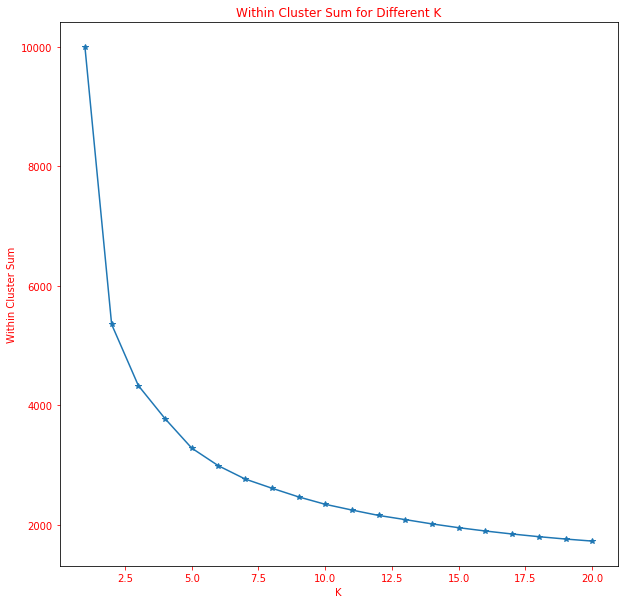

In [0]:
elbowplot(nj020220wss, 20)

In [0]:
nj020220wss1 = WSS(njtrd,50)

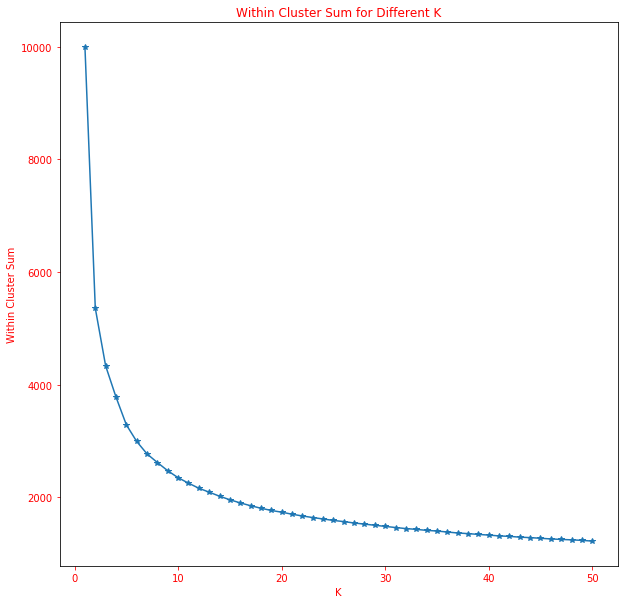

In [0]:
elbowplot(nj020220wss1, 50)

In [0]:
nj020220wss2 = WSS(njtrd,75)

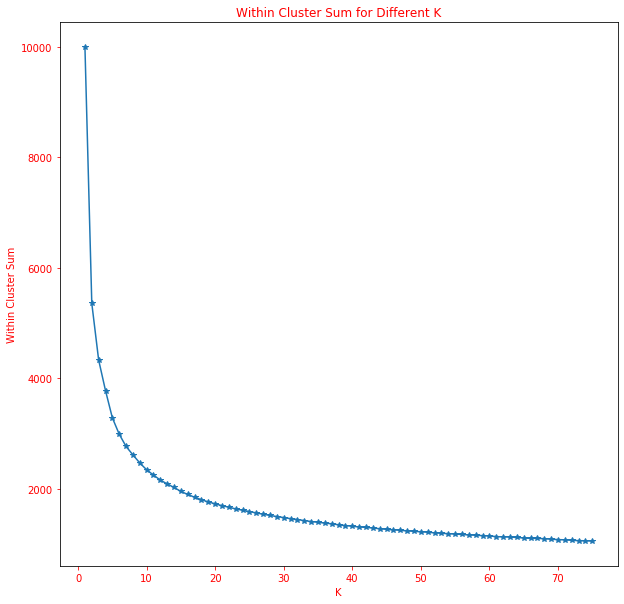

In [0]:
elbowplot(nj020220wss2, 75)

In [0]:
nj020220wss3 = WSS(njtrd,100)

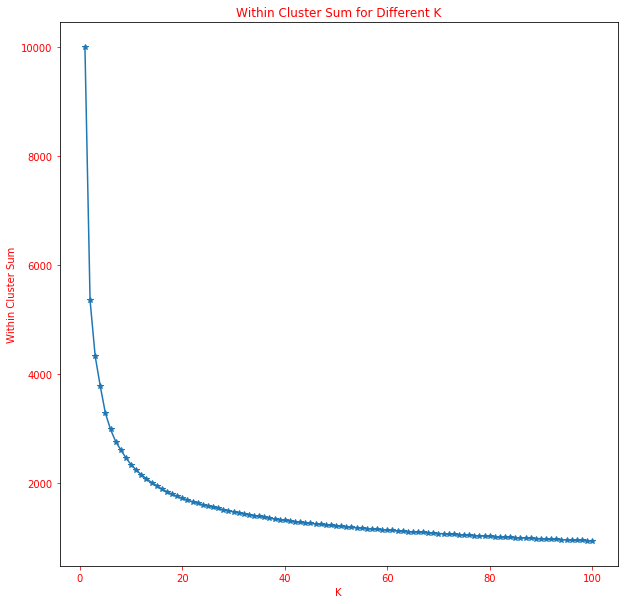

In [0]:
elbowplot(nj020220wss3, 100)

In [0]:
#nj020220shs = shscores(njtrd,20)
#shsplot(nj020220shs, 20)

## **Clustering**

From the elbow-plot and the silhouette plot, we can see that ***16*** represents a good number of clusters. The **elbow plot** reaches asymptotic behavior and there is a peak in the **silhouette plot**.

In [0]:
clusters = cluster(njtrd, 20, njcells)

In [0]:
njclustsize = [];
for i in range(1, len(clusters)):
  njclustsize.append(len(clusters[i]))

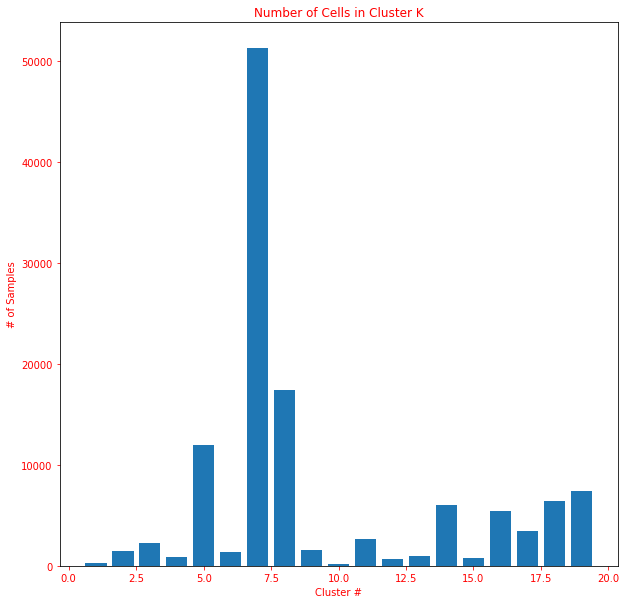

In [41]:
plt.figure(figsize=(10,10))
plt.bar(range(1,len(clusters)), njclustsize)
plt.title('Number of Cells in Cluster K', c = 'red')
plt.xlabel('Cluster #', c = 'red')
plt.ylabel('# of Samples', c = 'red')
plt.tick_params(axis = 'both', colors = 'red')

## **Write Clusters to File**

In [0]:
nj020220clusters = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in clusters.items()]))

In [0]:
dsave = root_dir + 'Predictive Performance Model/SampleData/Data/'
writer = pd.ExcelWriter("nj020220_1.xlsx")
nj020220clusters.to_excel(writer)
writer.save()
!cp nj020220_1.xlsx '/content/gdrive/My Drive/Predictive Performance Model/SampleData/Data'

In [0]:
njclust = '/content/gdrive/My Drive/Predictive Performance Model/SampleData/Data/nj020220_1.xlsx'

In [0]:
njclust = pd.read_excel(njclust, header = 0)

In [0]:
njclust1 = njclust[1]
njclust1 = njclust1.dropna()
njclust1 = njclust1.values
njc1data = njdata.loc[njclust1]
njc1data

In [0]:
freq1 = chars[7:24]
njdatafreq1 = njdata[freq1]
njdatafreq1

In [0]:
clust = []
for i in range(1, 21, 1):
  x = njclust[i]
  x = x.dropna()
  x = x.values
  clust.append(x)

In [0]:
freq1 = []
for i in range(0, len(clust), 1):
  freq1.append(njdatafreq1.loc[clust[i]].values)

In [65]:
freq1[0][0]

array([  717.,  2062., 29847., 28361., 24469., 17922., 12130.,  8006.,
       10714.,  5457., 11109., 12932., 16167., 19005., 22734., 26477.,
       27799.])

In [0]:
def plotfreq(data, k):
  plt.figure(figsize=(10,10))
  for i in range(0, len(data), 1):
    j = np.mod(i,3)
    plt.scatter(range(0,17), data[i], c = c[j])
    #plt.plot(range(0,17), data.iloc[i].values, c = c[j])
  plt.title('Freq 1 Cluster {}'.format(k), c = 'red')
  plt.xlabel('Freq #', c = 'red')
  plt.ylabel('Count', c = 'red')
  plt.tick_params(axis = 'both', colors = 'red')

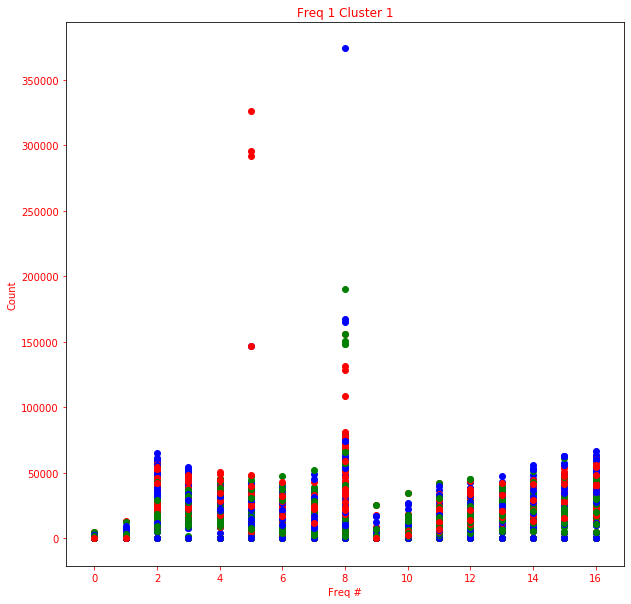

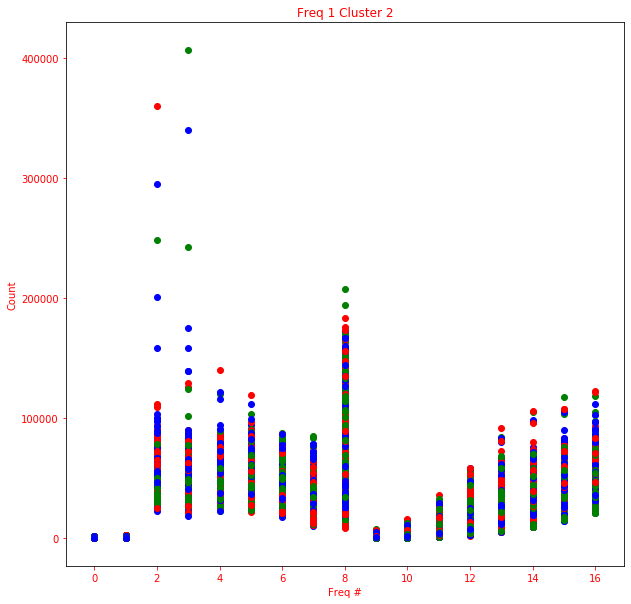

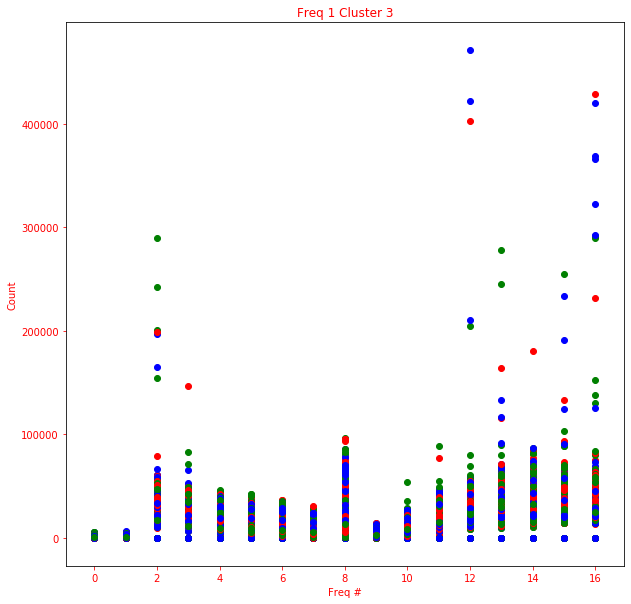

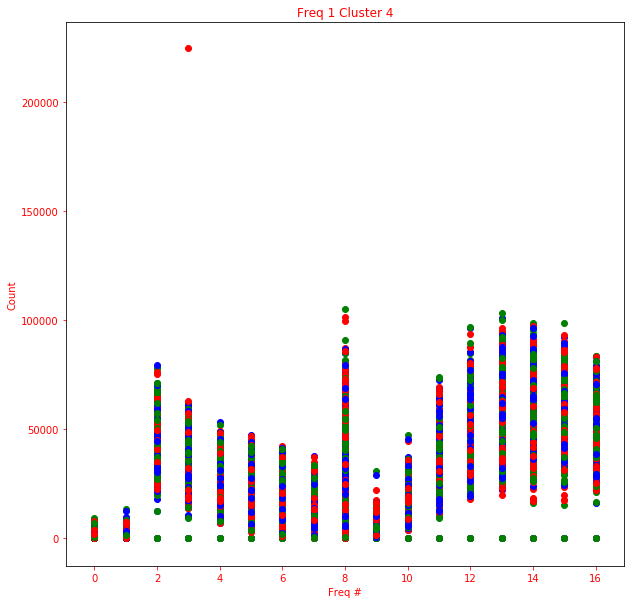

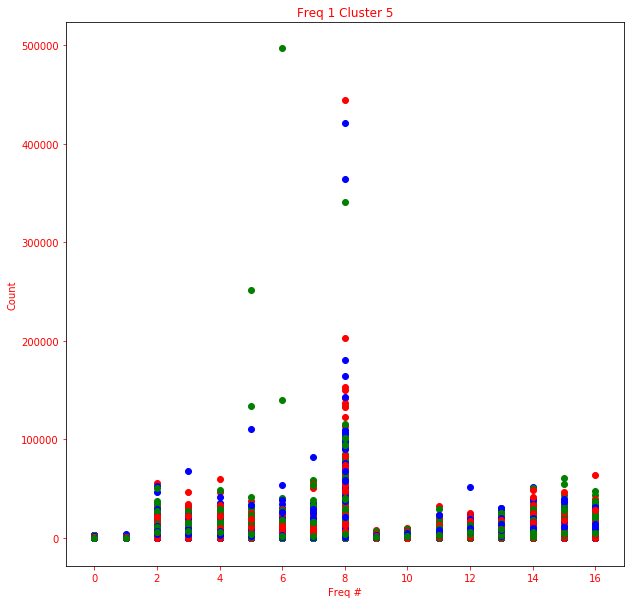

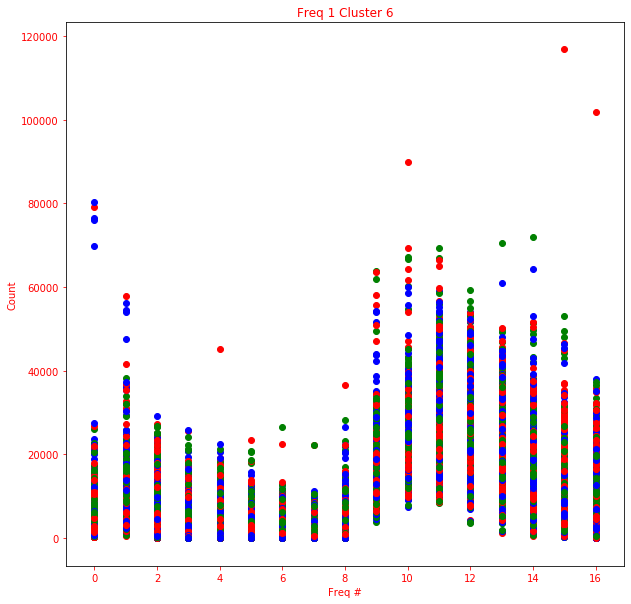

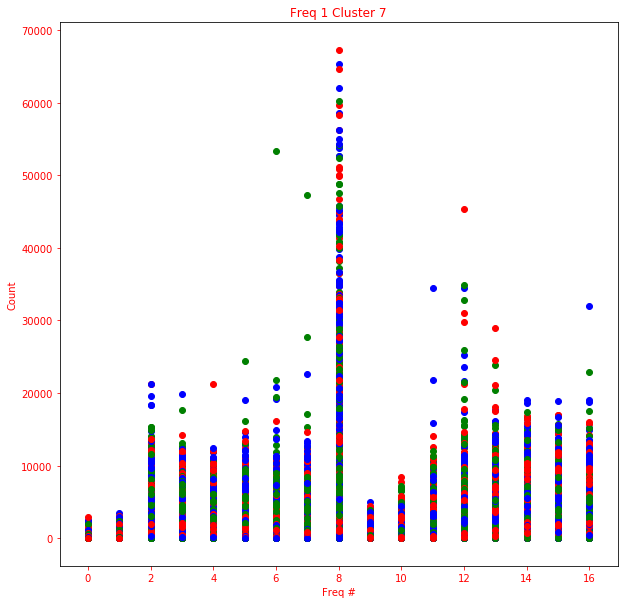

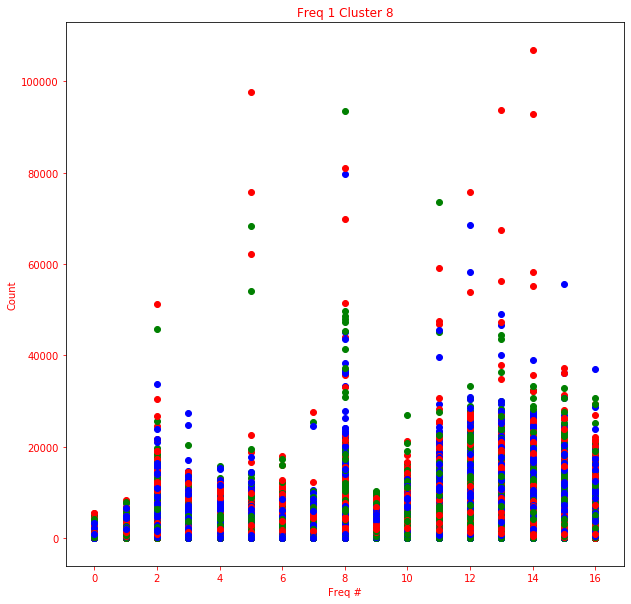

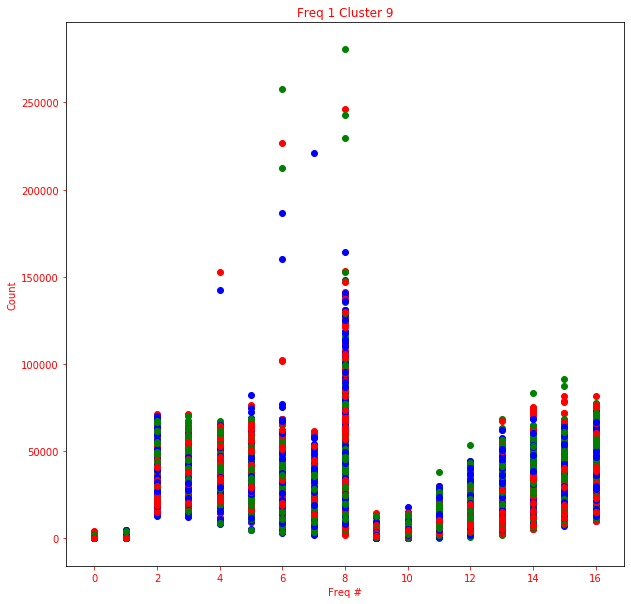

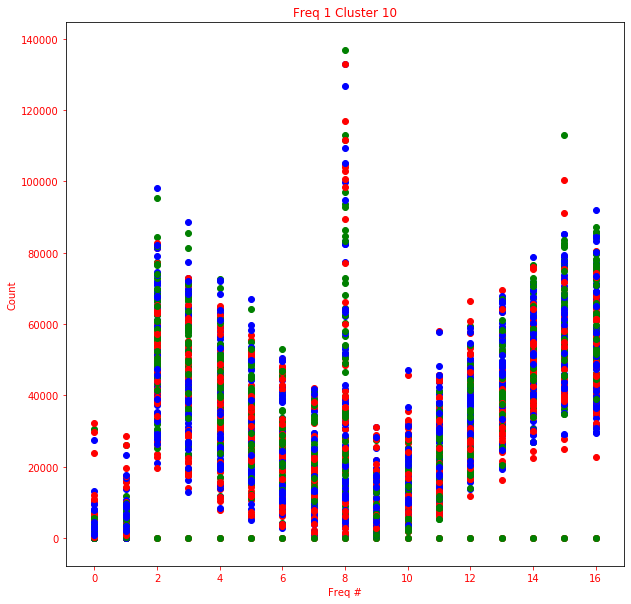

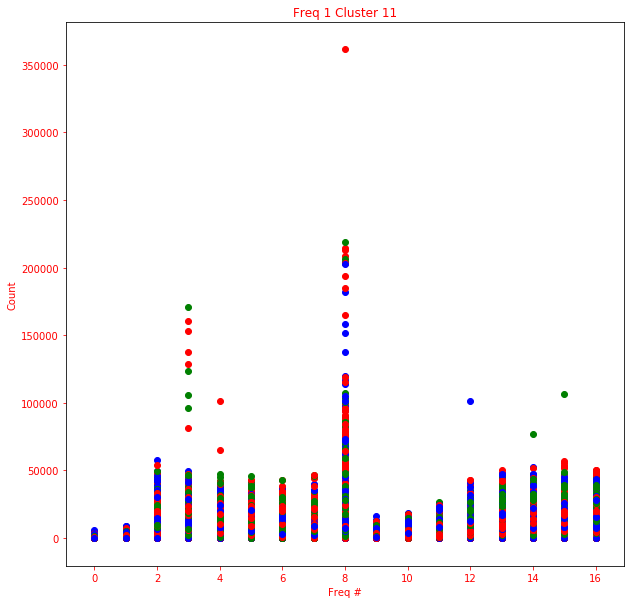

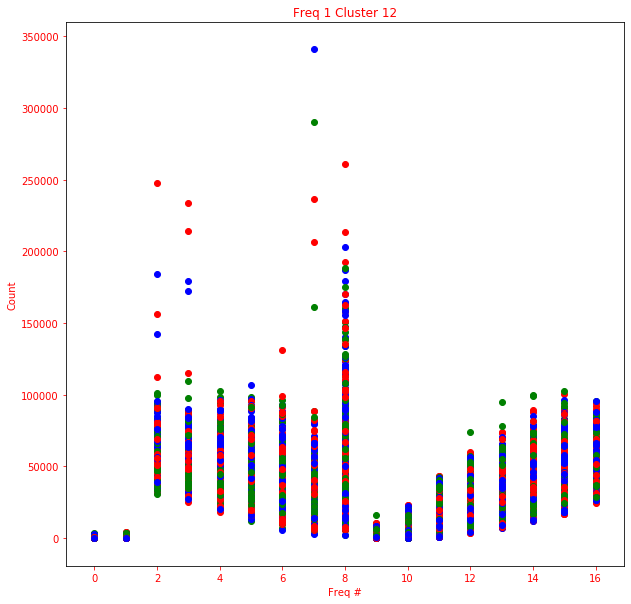

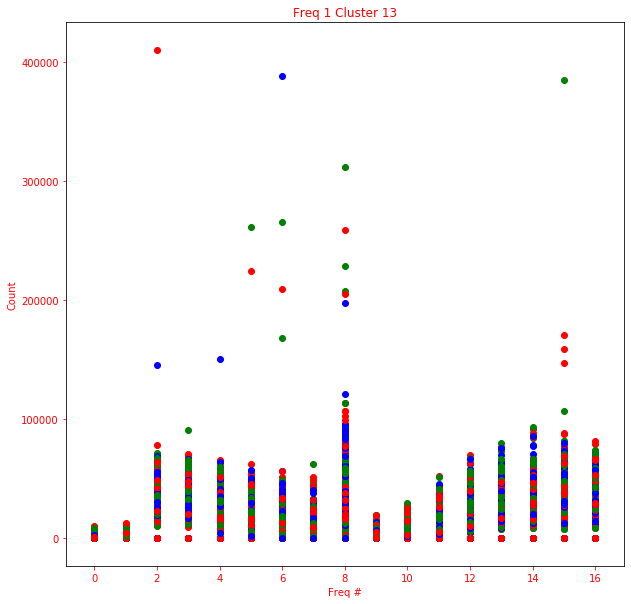

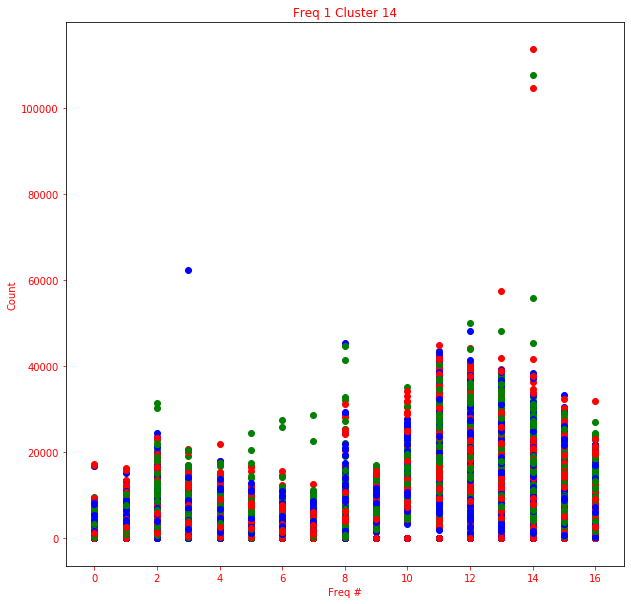

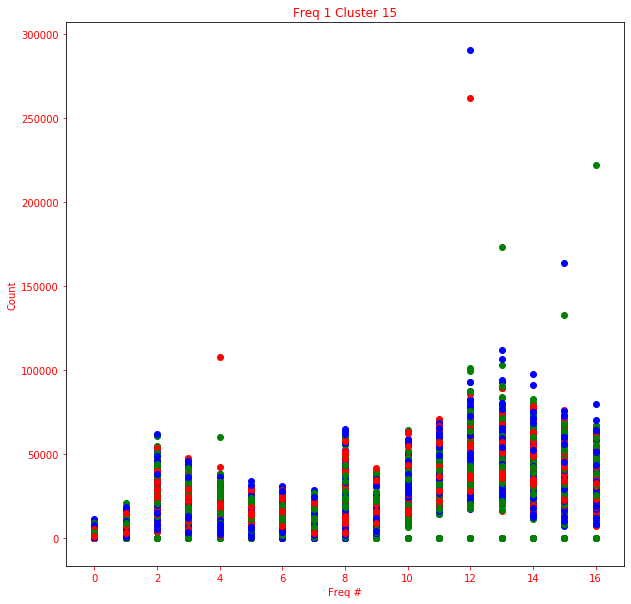

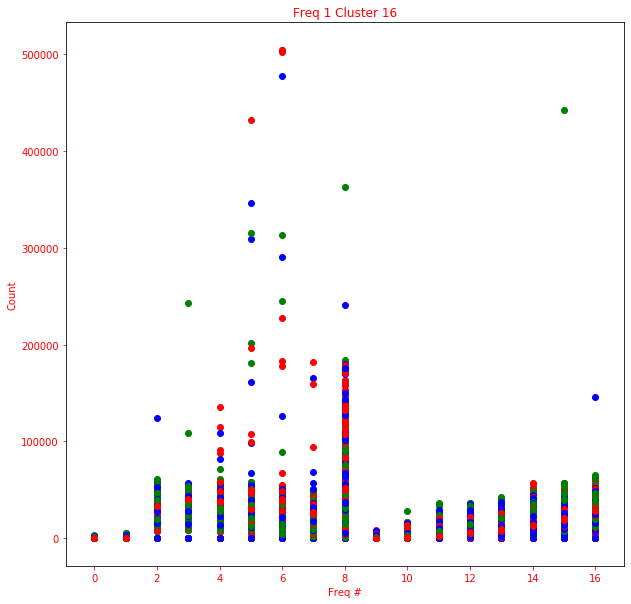

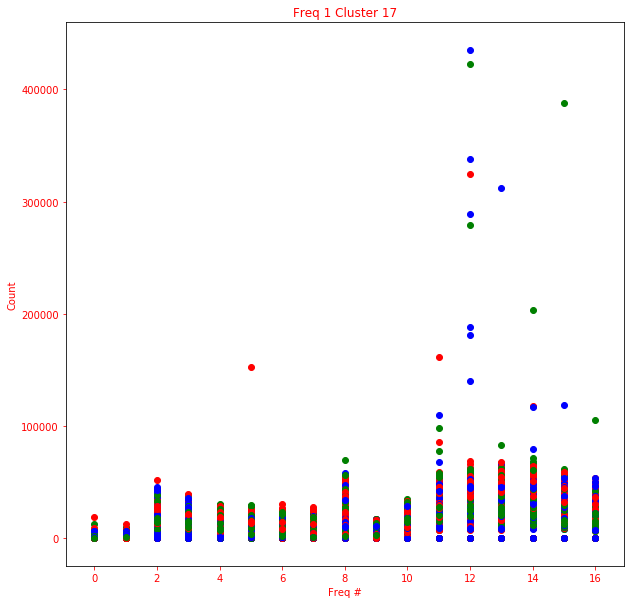

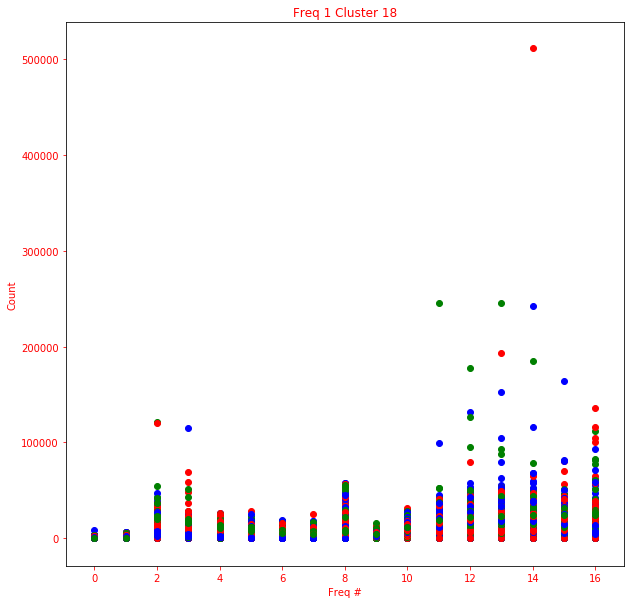

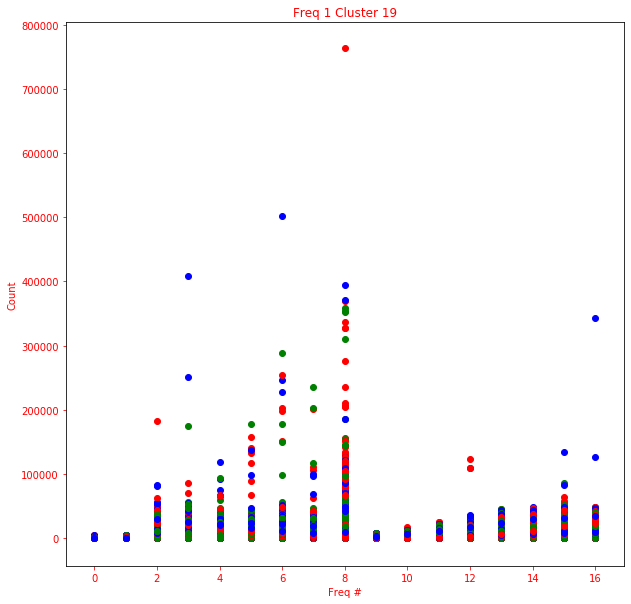

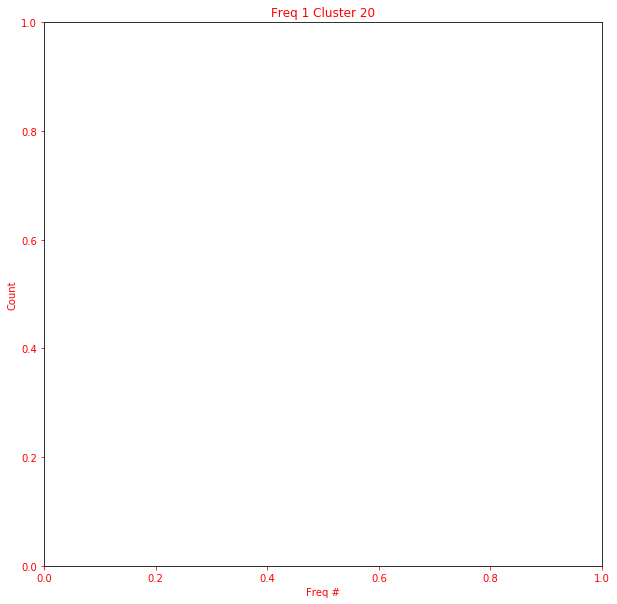

In [76]:
for i in range(0,len(freq1), 1):
  plotfreq(freq1[i], i + 1)